# Librerías

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importamos las librerías estándar
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#Importamos las librerías para construir la red
from keras.models import Sequential
from keras.layers import Dense

In [4]:
#Importamos el objeto que nos permite definir una capa convolucional para procesar imágenes en 2D
from keras.layers import Conv2D

# Imagen de prueba

In [5]:
#Importamos una imagen de prueba para practicar algún filtro
from scipy import misc

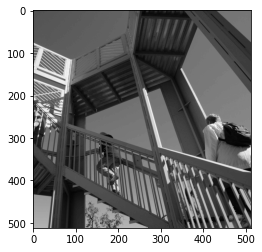

In [6]:
#Vamos a tomar una imagen
imagen_tensor = misc.ascent()

#Esta imagen es una fotografía en escala de grises de personas subiendo una escalera
plt.imshow(imagen_tensor, cmap='gray')

# Estructura del dataset de entrenamiento

In [7]:
#Vemos que la imagen es un tensor de 512x512
imagen_tensor.shape

(512, 512)

In [8]:
#Vamos a convertir a la imagen en un tensor de entrenamiento para una capa convolucional que descubra patrones (filtros)
#¿Qué estructura tiene un tensor de entrenamiento para una capa convolucional?
#Es un tensor de 4 dimensiones
#En la primera está el dataset de entrenamiento, en este ejemplo sólo tenemos una imagen, así que el valor será 1
#En la segunda y la tercera está la posición X y Y del pixel en la imagen, en este caso las imágenes tendrán 512x512 píxeles
#En la cuarta los canales utilizados, en este caso al ser una imagen en escala de grises sólo necesitaremos un canal el cual tomará valores entre 0 a 255
x_tensor_entrenamiento = imagen_tensor.reshape((1, 512, 512, 1))
x_tensor_entrenamiento.shape

(1, 512, 512, 1)

In [9]:
#Si consultamos la primera posición, tendremos la descripción de la primera imagen (512x512 píxeles, con 1 canal (escala de grises))
x_tensor_entrenamiento[0].shape

(512, 512, 1)

In [11]:
#Podriamos usar una capa convolucional para encontrar patrones visuales, pero usaremos variaciones optimizadas
from keras.layers import Conv2D

# Pooling Max

In [10]:
#Importamos las librerías de pooling
from keras.layers import MaxPool2D

In [25]:
#Creamos un modelo
model = Sequential()

In [26]:
#Agregamos una capa que tomará el valor máximo obtenido al aplicar el filtro de 3x3
#Las imágenes que se procesarán son de 512x512 píxeles con 1 canal
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))

In [27]:
#Compilamos
model.compile('adam', 'mse')

In [28]:
#Usaremos el modelo para aplicarle los filtros encontrados a la misma imagen
tensor_imagenes_con_filtros = model.predict(x_tensor_entrenamiento)

#Notemos que el modelo al usar una capa MaxPool de 3x3, ha reducido el tamaño original de la iamgen (512) entre 5 (102)
#Esto significa que la siguiente capa convolucional que busque patrones más específicos hará menos cálculos matemáticos, ya que tomará un tensor más pequeño
tensor_imagenes_con_filtros.shape

(1, 256, 256, 1)

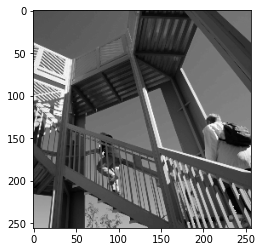

In [29]:
#¿Visualmente esto como se interpreta?

#Extraemos la primera y única imagen
#Vemos que al aplicarle el filtro, la capa convolucional devuelve una imagen de 255x510 píxeles
imagen_con_filtro = tensor_imagenes_con_filtros[0, :, :, 0]

#Vamos a pintar la imagen
#Como ahora estamos usando un pooling MAX significa que de la matriz de patrones encontrados, sólo nos quedamos con el valor máximo
#Por eso la imagen se ve un poco pixeleada, por que estamos perdiendo información
plt.imshow(imagen_con_filtro, cmap='gray')

# Pooling AVG

In [30]:
#Importamos las librerías de pooling
from keras.layers import AvgPool2D

In [36]:
#Creamos un modelo
model = Sequential()

In [37]:
#Agregamos una capa que tomará el valor máximo obtenido al aplicar el filtro de 5x5
#Las imágenes que se procesarán son de 512x512 píxeles con 1 canal
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))

In [38]:
#Compilamos
model.compile('adam', 'mse')

In [39]:
#Usaremos el modelo para aplicarle los filtros encontrados a la misma imagen
tensor_imagenes_con_filtros = model.predict(x_tensor_entrenamiento)
tensor_imagenes_con_filtros.shape

(1, 51, 51, 1)

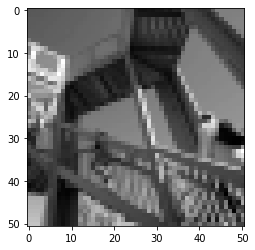

In [40]:
#¿Visualmente esto como se interpreta?

#Extraemos la primera y única imagen
#Vemos que al aplicarle el filtro, la capa convolucional devuelve una imagen de 255x510 píxeles
imagen_con_filtro = tensor_imagenes_con_filtros[0, :, :, 0]

#Vamos a pintar la imagen
#Como ahora estamos usando un pooling AVG significa que de la matriz de patrones encontrados, promediaremos todos sus valores
#Al promediar los valores, vemos que la imagen es más suave comparada con la anterior, ya que no usa un dato extremo, si no el promedio
plt.imshow(imagen_con_filtro, cmap='gray')